# EEG Psychological Disorders (EPD) - Exploratory Data Analysis

Park, S. M. (2021, August 16). EEG machine learning. Retrieved from [OSFHOME](https://osf.io/8bsvr/)

This notebook has the objective of carrying out an exploratory analysis on the EEG machine learning dataset data, in which the sociodemographic variables as well as the variables related to the EEG analysis will be analyzed.

## A. Imports

### 1. Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import stats

### 2. Data

In [2]:
file_dir = 'C:/Users/mcabo/Desktop/Proyects/Machine Learning/data/EEG.machinelearing_data_BRMH.csv'
file_name =  "/EEG.machinelearing_data_BRMH.csv"

df = pd.read_csv(file_dir + file_name, sep = ",")

## B. Functions (***f***)

In [3]:
def plot_pca(data, ax, title):
    sns.scatterplot(data=data, x='PC1', y='PC2', hue='target', alpha=0.4, ax=ax)
    ax.set_xlabel('CP1')
    ax.set_ylabel('CP2')
    ax.set_title(title)
    ax.legend(title='Main Disorders')
    ax.grid(True)

## C. **Data Understanding**

### 1. General

In [4]:
df.shape

(945, 1149)

In [5]:
df.sample()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
370,371,F,41.24,2011.11.16,12.0,99.0,Mood disorder,Depressive disorder,11.375444,12.154638,...,36.858159,16.51478,20.997431,23.144913,54.758597,20.069236,45.790521,8.996152,39.858857,28.067807


In [6]:
df.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [8]:
df.select_dtypes(include='object').head(1)

,sex,eeg.date,main.disorder,specific.disorder
0,M,2012.8.30,Addictive disorder,Alcohol use disorder


### 2. Understanding EEG variables

In [9]:
nvars_EEG_AB = len([col for col in df.columns if col.startswith('AB.')])
nvars_EEG_COH = len([col for col in df.columns if col.startswith('COH.')])
nvars_not_EEG = len([col for col in df.columns if not (col.startswith('AB.') or col.startswith('COH.'))])
print('Total of attributes starting with AB.: ', nvars_EEG_AB)
print('Total of attributes starting with COH.: ', nvars_EEG_COH)
print('Total of attributes not EEG: ', nvars_not_EEG)

Total of attributes starting with AB.:  114
Total of attributes starting with COH.:  1026
Total of attributes not EEG:  9


#### Electrodes: EEG system used for research

In [10]:
prefix = 'AB.A.delta.'
electrodes = [col.split('.')[-1] for col in df.columns if col.startswith(prefix)]
electrodes

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'T3',
 'C3',
 'Cz',
 'C4',
 'T4',
 'T5',
 'P3',
 'Pz',
 'P4',
 'T6',
 'O1',
 'O2']

[These electrodes correpond to the 10-20 system](https://liceaga.facmed.unam.mx/deptos/fisiologia/wp-content/uploads/2019/09/UTI-pr%C3%A1ctica-7-a.-Electroencefalograma.-AnexoManual.pdf)


#### Brain Waves used

In [11]:
brain_waves = []
for var in df.columns:
    parts = var.split('.')
    if len(parts) >= 3:
        wave_name = parts[2]
        brain_waves.append(wave_name)
brain_waves = set(brain_waves)

print('Brain Waves used in the research: ', brain_waves)

Brain Waves used in the research:  {'delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma'}


#### Type of EEG variables

In [12]:
COH_vars_unique_w = len([col for col in df.columns if col.startswith('COH.A')])


if len(electrodes) * len(brain_waves) == nvars_EEG_AB:
    print('The AB variables correspond to analysis bands, it analyzes the value of a certain wave of each electrode.')
else:
    print('Continue searching...')
if COH_vars_unique_w * len(brain_waves) == nvars_EEG_COH:
    print('The COH variables correspond to COHERENCE, it is a measure of synchronization between 2 EEG signals.')
else:
    print('Continue searching...')

The AB variables correspond to analysis bands, it analyzes the value of a certain wave of each electrode.
The COH variables correspond to COHERENCE, it is a measure of synchronization between 2 EEG signals.


### 3. Variables description

- Ids: 945
- Atributes: 1149 (7 specifics and 1141 EGG related)

**Atributes description**
- *No.o*
- *Sex*
- *Age*
- *EEG_date*
- *Education*: 0 to 20 
- *IQ*
- *Main disorders* and their *Specific disorders*: 
    1. Mood disorder: 1.1 Depressive disorder, 1.2 Bipolar disorder
    2. Addictive disorder: 2.1 Alcohol use disorder, 2.2 Behavioral addiction disorder
    3. PTSD 
    4. Schizophrenia: 4.1 Schizophrenia
    5. Trauma and stress related disorder: 5.1 Panic disorder, 5.2 PTSD, 5.3 Social anxiety disorder, 5.4 Acute stress disorder, 5.5 Adjustment disorder
    6. Healthy control: 6.1 Healthy control
    7. OCD: 7.1 OCD
- *EEG Parameters*:         w = delta, theta, alpha, beta, highbeta or gamma
    1. Analysis Bands (AB):  19 electrodes * 6 brain waves = 114 attributes
    2. COHERENCE (COH): 171 electrodes sync * 6 brain waves = 1026 attributes

## D. EDA

In [13]:
#df['no.'].nunique()
df = df.set_index('no.')

### 1. Cleaning & dtypes

In [14]:
df.isnull().sum()[df.isnull().any()]

education        15
IQ               13
Unnamed: 122    945
dtype: int64

In [15]:
def cleaning(df):
    df.drop('Unnamed: 122', axis=1, inplace = True)
    df['eeg.date'] = pd.to_datetime(df['eeg.date'], format='mixed')
    df['education'].fillna(df['education'].median(), inplace = True)
    df['IQ'].fillna(df['IQ'].median(), inplace = True)
    return df

df = cleaning(df)

### 2. Sociodemographic Analysis

#### 2.1. Univariant Analysis

##### 2.1.1. Target Visual Analysis

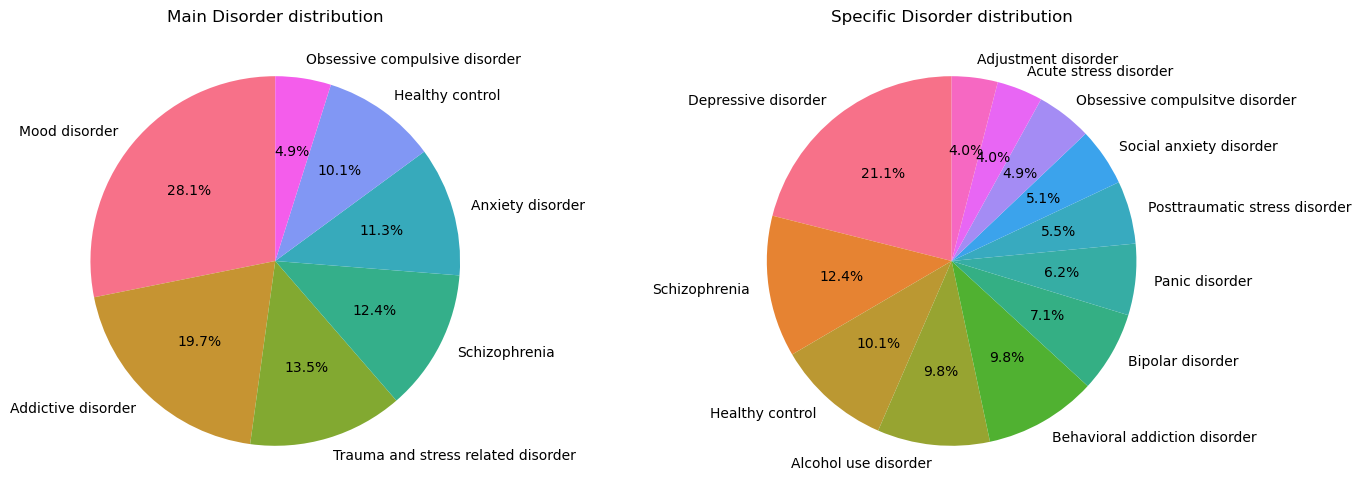

,main.disorder,target,percentage
0,Mood disorder,266,28.148148
1,Addictive disorder,186,19.682540
2,Trauma and stress related disorder,128,13.544974
3,Schizophrenia,117,12.380952
4,Anxiety disorder,107,11.322751
5,Healthy control,95,10.052910
6,Obsessive compulsive disorder,46,4.867725


,specific.disorder,target,percentage
0,Depressive disorder,199,21.058201
1,Schizophrenia,117,12.380952
2,Healthy control,95,10.052910
3,Alcohol use disorder,93,9.841270
4,Behavioral addiction disorder,93,9.841270
5,Bipolar disorder,67,7.089947
6,Panic disorder,59,6.243386
7,Posttraumatic stress disorder,52,5.502646
8,Social anxiety disorder,48,5.079365
9,Obsessive compulsitve disorder,46,4.867725


In [16]:
df_md = pd.DataFrame(df['main.disorder'].value_counts()).reset_index()
df_md.columns = ['main.disorder', 'target']  
df_md['percentage'] = df_md['target'] / df_md['target'].sum() * 100

df_sd = pd.DataFrame(df['specific.disorder'].value_counts()).reset_index()
df_sd.columns = ['specific.disorder', 'target']  
df_sd['percentage'] = df_sd['target'] / df_sd['target'].sum() * 100

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

colors = sns.color_palette("husl", len(df_md))
axs[0].pie(df_md['target'], labels=df_md['main.disorder'], colors=colors, startangle=90, autopct='%1.1f%%')
axs[0].set_title('Main Disorder distribution')

colors = sns.color_palette("husl", len(df_sd))
axs[1].pie(df_sd['target'], labels=df_sd['specific.disorder'], colors=colors, startangle=90, autopct='%1.1f%%')
axs[1].set_title('Specific Disorder distribution')

plt.show()

display(df_md)
display(df_sd)

##### 2.1.2. General attributes and target distribution

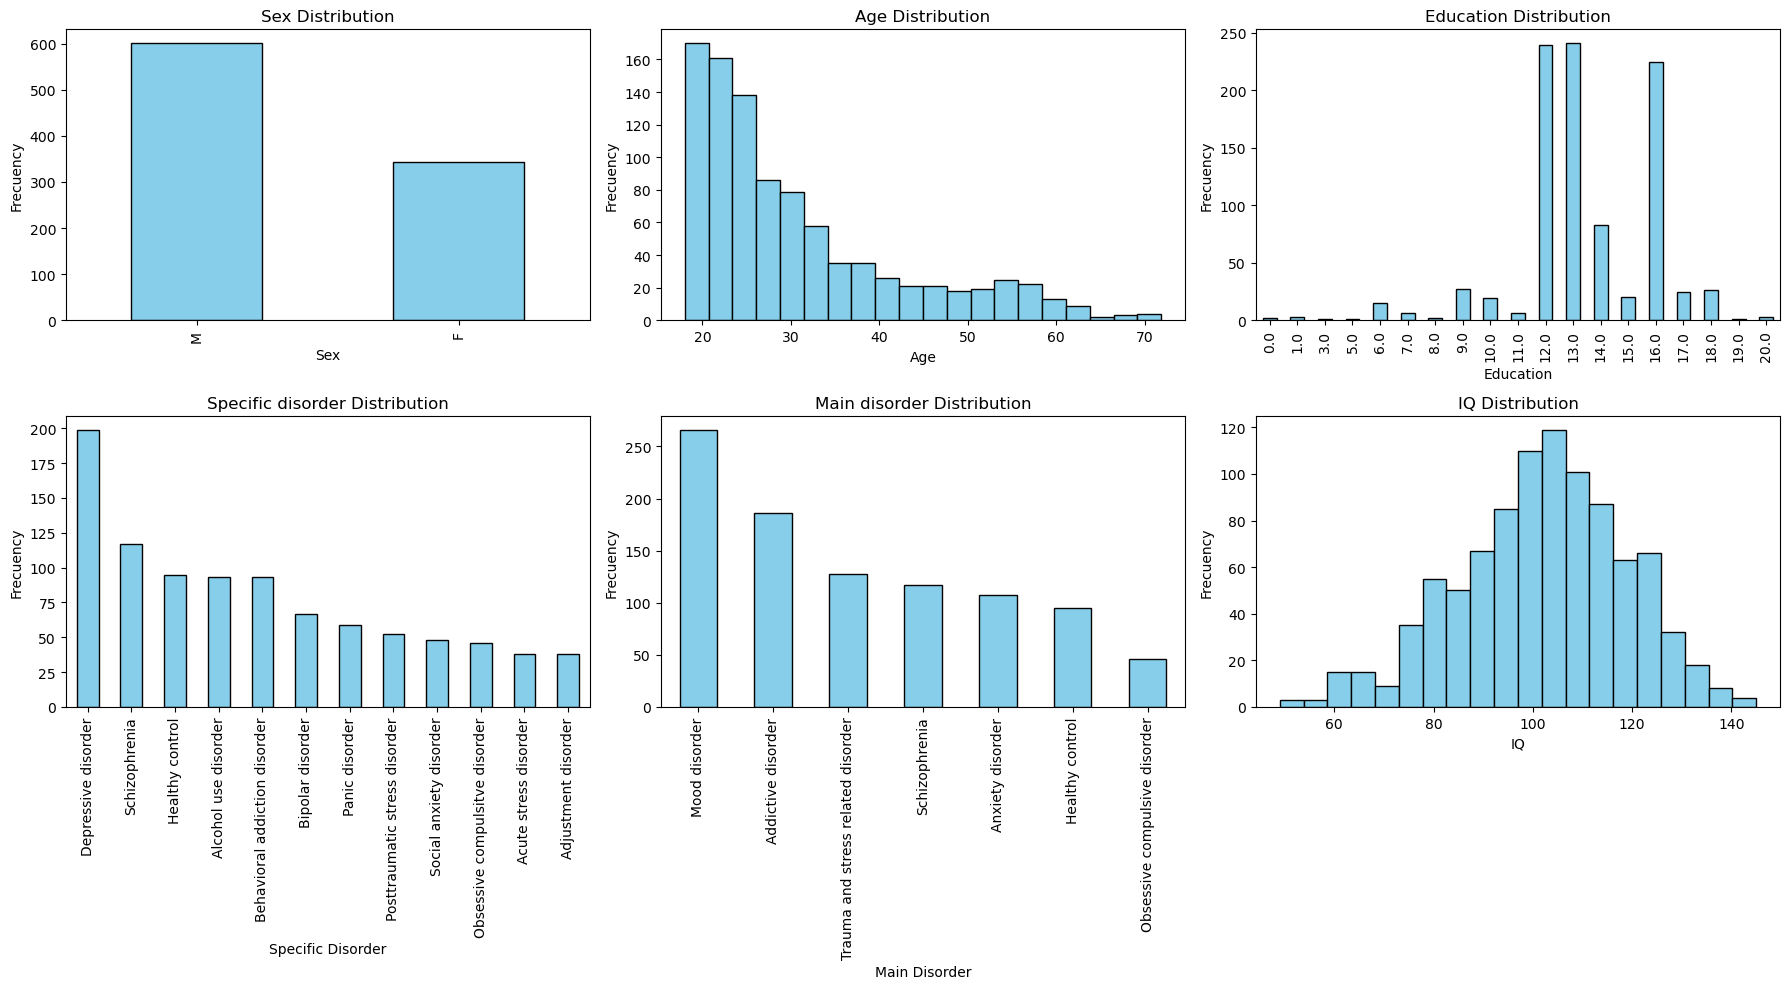

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

df['sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_xlabel('Sex')
axs[0, 0].set_ylabel('Frecuency')
axs[0, 0].set_title('Sex Distribution')

axs[0, 1].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].set_title('Age Distribution')

df['education'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[0, 2])
axs[0, 2].set_xlabel('Education')
axs[0, 2].set_ylabel('Frecuency')
axs[0, 2].set_title('Education Distribution')

df['specific.disorder'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_xlabel('Specific Disorder')
axs[1, 0].set_ylabel('Frecuency')
axs[1, 0].set_title('Specific disorder Distribution')

df['main.disorder'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_xlabel('Main Disorder')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].set_title('Main disorder Distribution')

axs[1, 2].hist(df['IQ'], bins=20, color='skyblue', edgecolor='black')
axs[1, 2].set_xlabel('IQ')
axs[1, 2].set_ylabel('Frecuency')
axs[1, 2].set_title('IQ Distribution')

plt.tight_layout()
plt.show()

In [18]:
print('Median of age are: ', round(df['age'].median(), 2))
print('Mean of education score are: ', round(df['education'].mean(), 2))
print('Mean of IQ score are: ', round(df['IQ'].mean(), 2))

Median of age are:  26.15
Mean of education score are:  13.43
Mean of IQ score are:  101.59


#### 2.2. Bivariant Analysis

##### 2.2.1. Relation with Specific Disorder

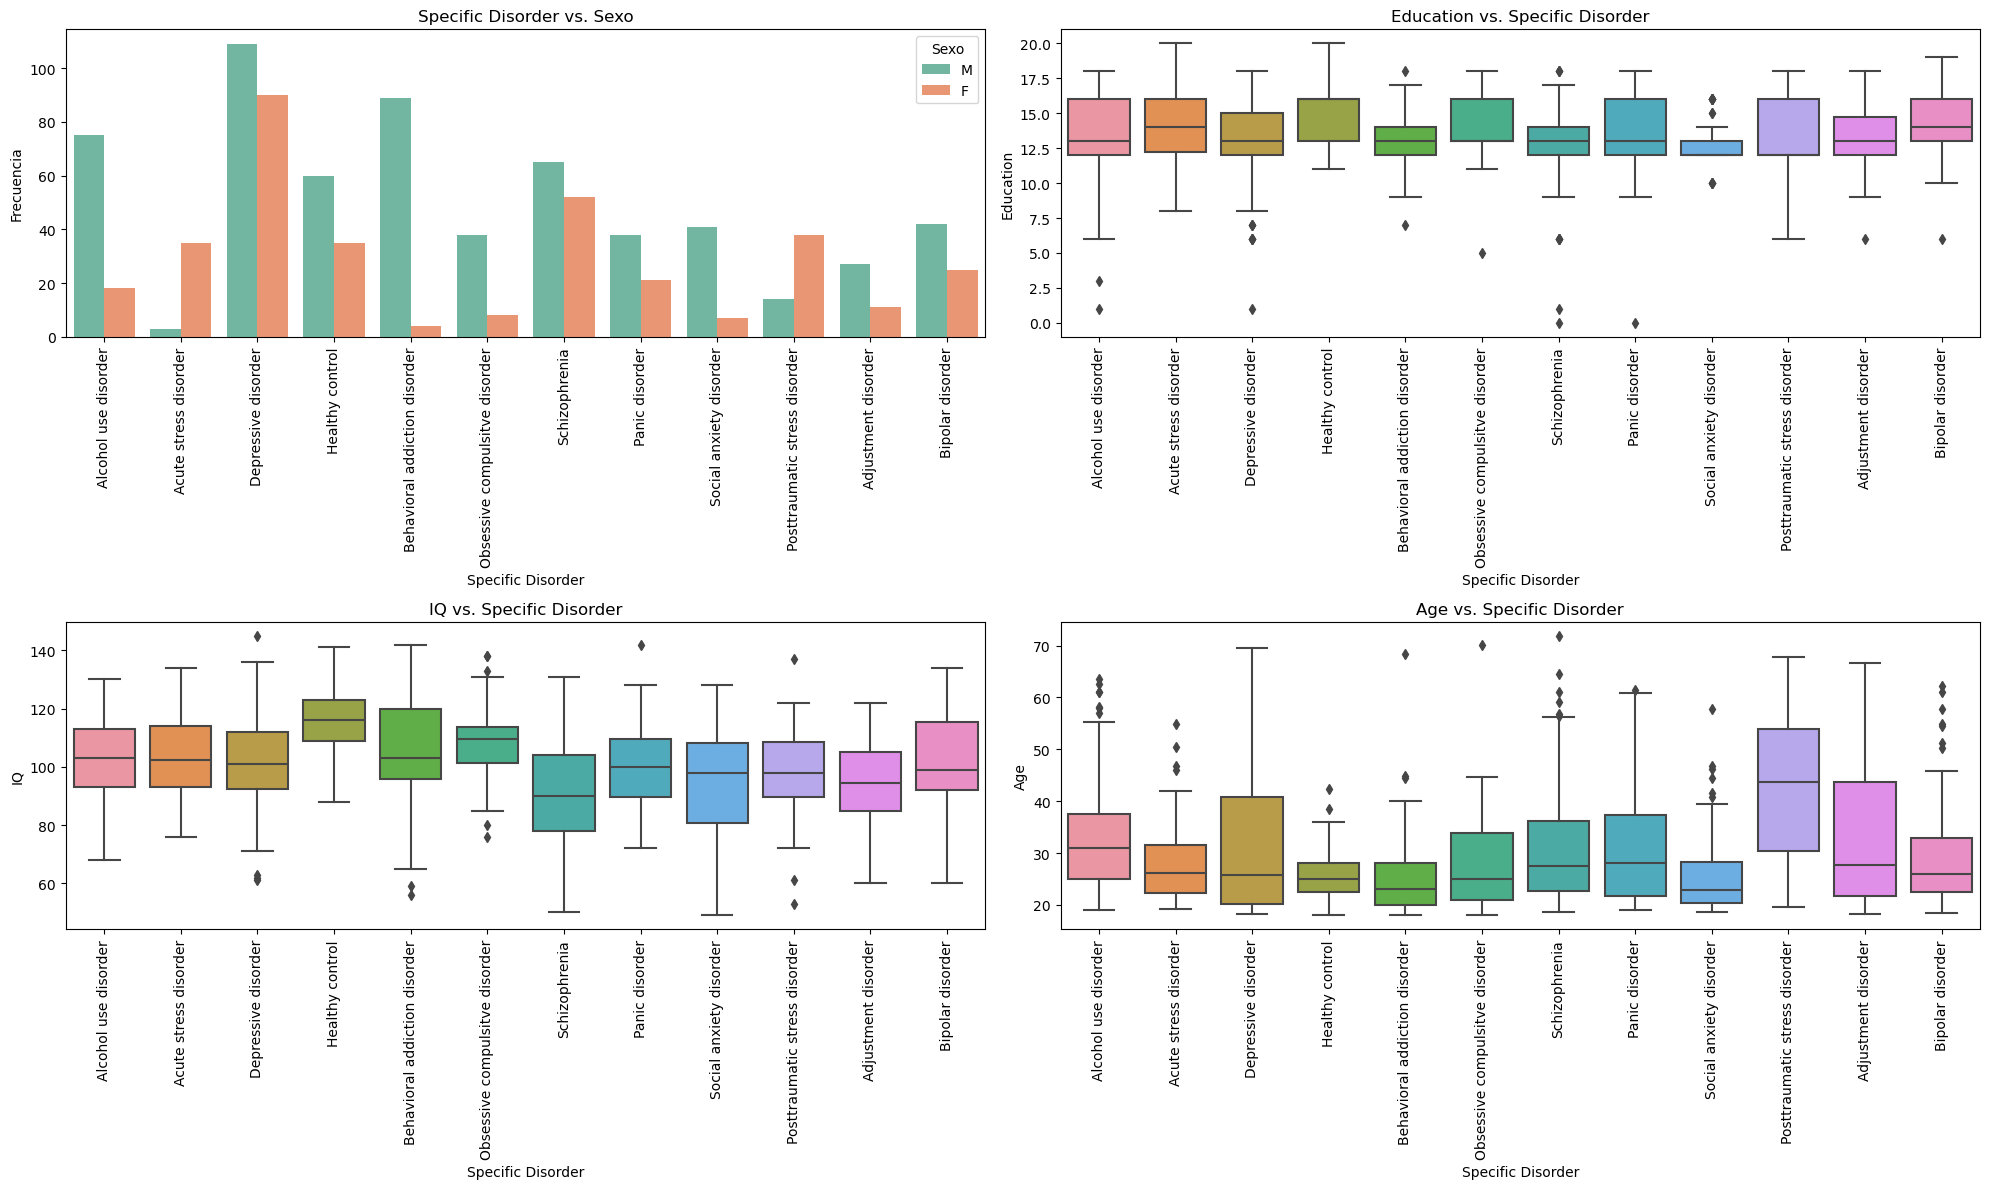

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='specific.disorder', hue='sex', data=df, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_xlabel('Specific Disorder')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_title('Specific Disorder vs. Sexo')
axs[0, 0].legend(title='Sexo')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(x='specific.disorder', y='education', data=df, ax=axs[0, 1])
axs[0, 1].set_xlabel('Specific Disorder')
axs[0, 1].set_ylabel('Education')
axs[0, 1].set_title('Education vs. Specific Disorder')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(x='specific.disorder', y='IQ', data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel('Specific Disorder')
axs[1, 0].set_ylabel('IQ')
axs[1, 0].set_title('IQ vs. Specific Disorder')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)

sns.boxplot(x='specific.disorder', y='age', data=df, ax=axs[1, 1])
axs[1, 1].set_xlabel('Specific Disorder')
axs[1, 1].set_ylabel('Age')
axs[1, 1].set_title('Age vs. Specific Disorder')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#### 2.2.2. Relation with main disorders

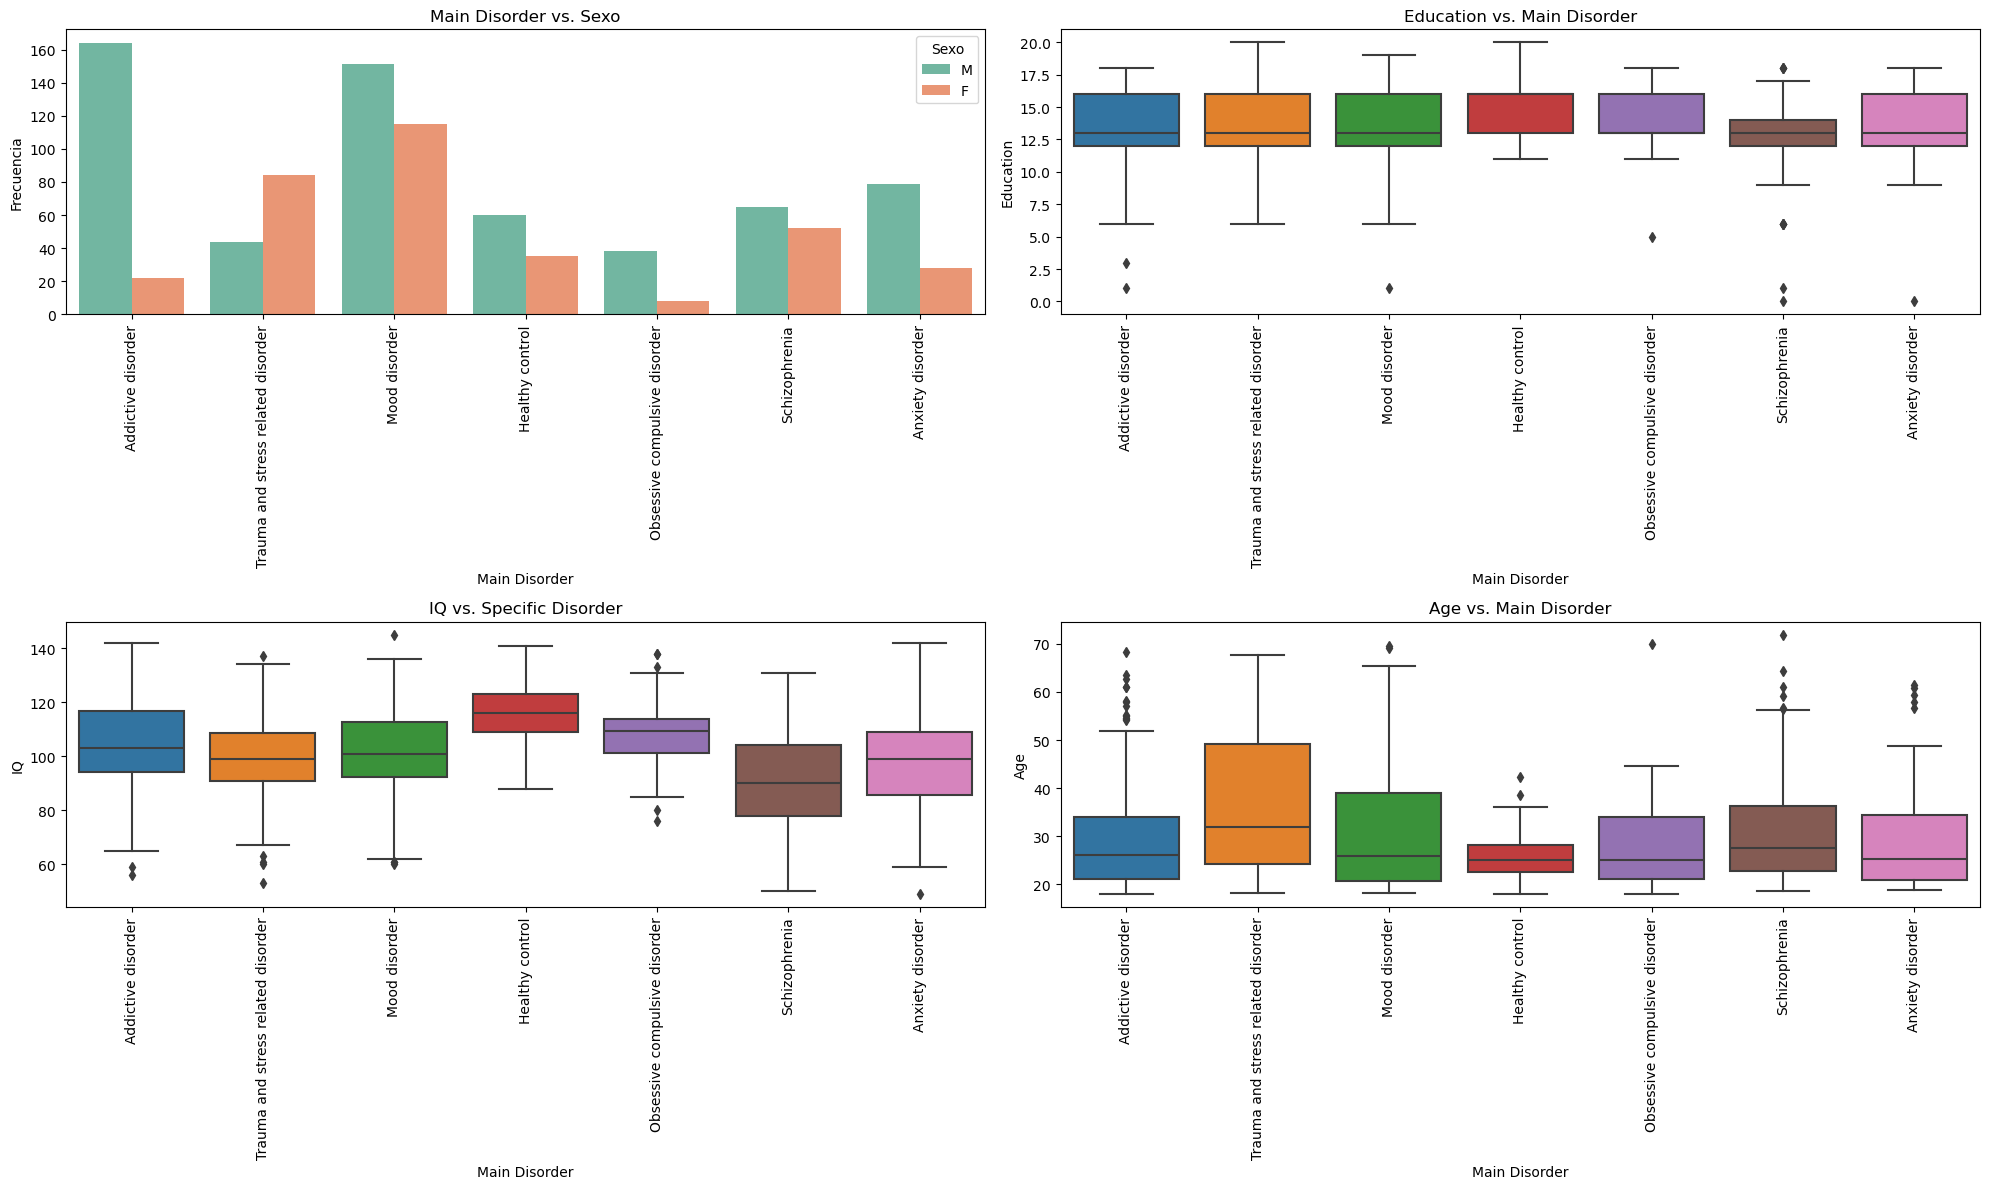

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='main.disorder', hue='sex', data=df, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_xlabel('Main Disorder')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_title('Main Disorder vs. Sexo')
axs[0, 0].legend(title='Sexo')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(x='main.disorder', y='education', data=df, ax=axs[0, 1])
axs[0, 1].set_xlabel('Main Disorder')
axs[0, 1].set_ylabel('Education')
axs[0, 1].set_title('Education vs. Main Disorder')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(x='main.disorder', y='IQ', data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel('Main Disorder')
axs[1, 0].set_ylabel('IQ')
axs[1, 0].set_title('IQ vs. Specific Disorder')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)

sns.boxplot(x='main.disorder', y='age', data=df, ax=axs[1, 1])
axs[1, 1].set_xlabel('Main Disorder')
axs[1, 1].set_ylabel('Age')
axs[1, 1].set_title('Age vs. Main Disorder')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### 3. EEG attributes analysis

#### 3.1. Univariant Analysis

#### Analysis Bands Distribution

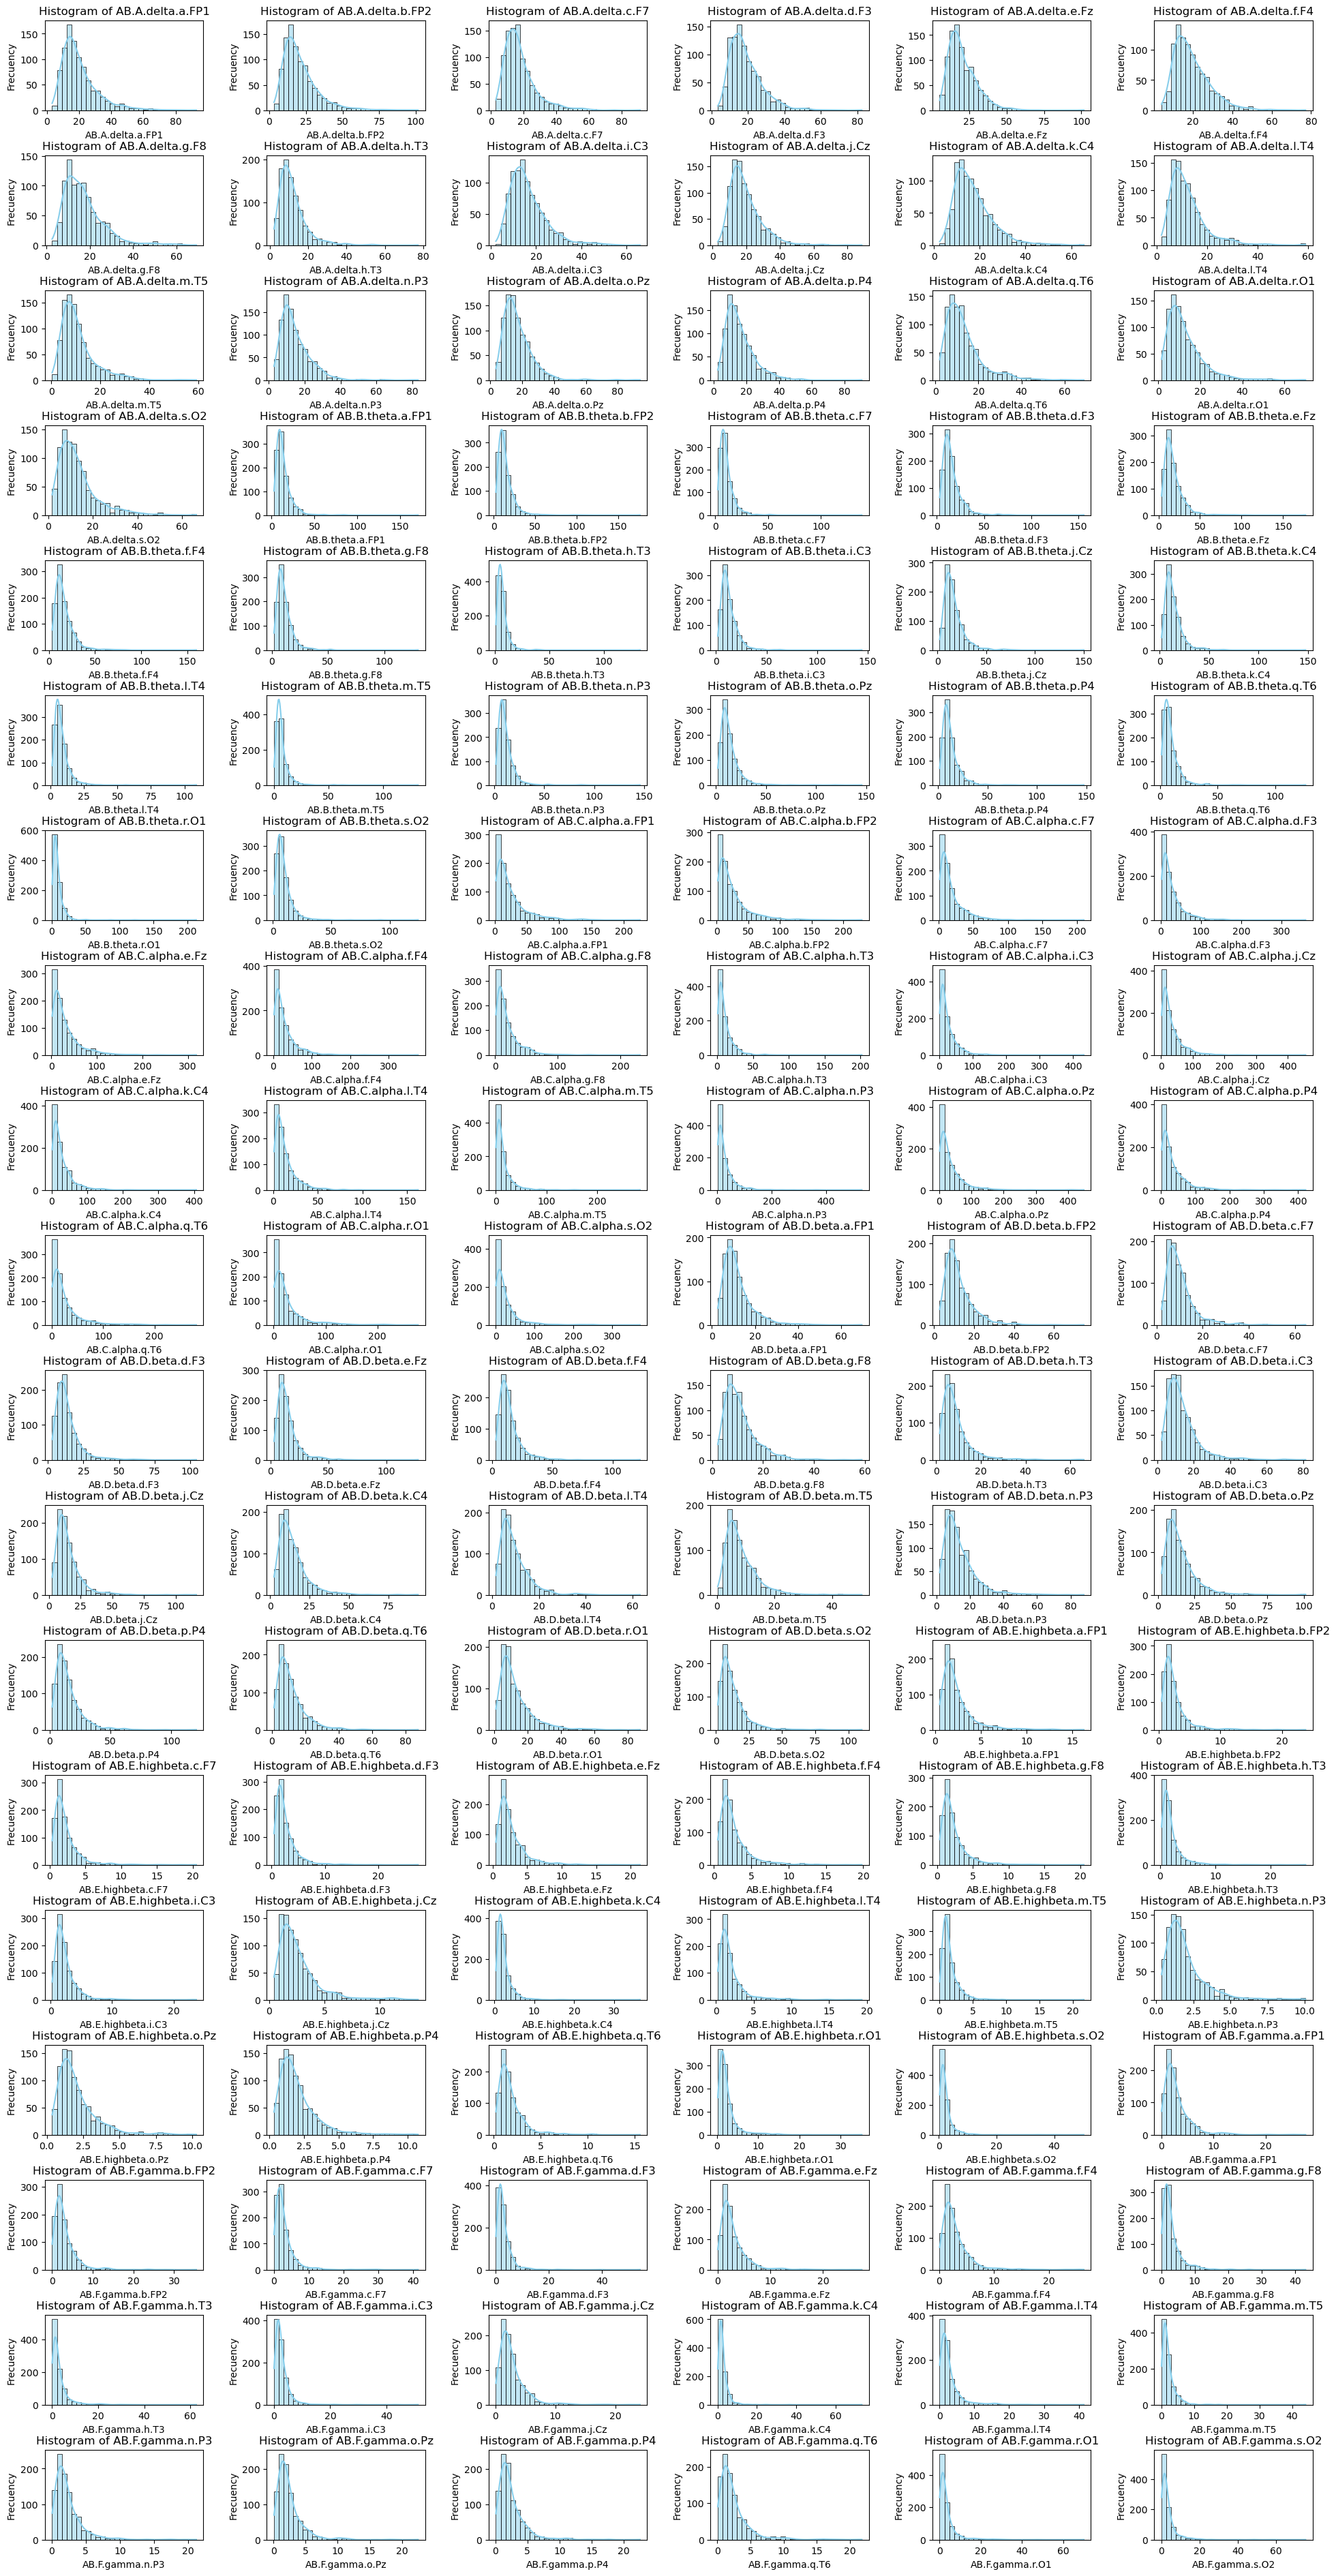

In [21]:
AB_cols = [col for col in df.columns if col.startswith('AB.')]

fig, axes = plt.subplots(19, 6, figsize=(24, 48))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Recorrer las variables y los ejes para generar los histogramas
for ax, var in zip(axes.flatten(), AB_cols):
    sns.histplot(df[var], bins=30, color='skyblue', edgecolor='black',kde =  True, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuency')
    ax.set_title(f'Histogram of {var}')

### 3.2. Bivariant Analysis

#### 3.2.1. Reducing dimensionality of Coherence EEG features

In [22]:
df['Groups'] = df.apply(lambda row: "Healthy control" if row['main.disorder'] == "Healthy control" else "Mental Disorder", axis=1)

COH_cols = [col for col in df.columns if col.startswith('COH.')]

Comparing the relationship of the Principal Components of EEG-COH and EEG-AB with experimental group and control group

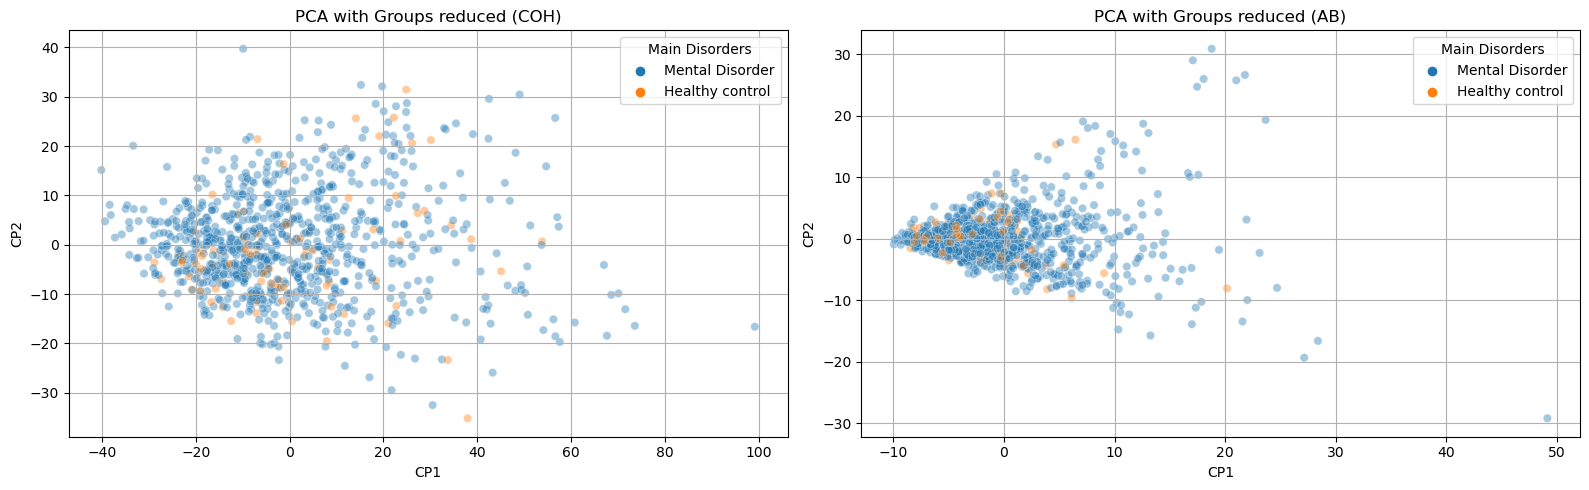

In [23]:
scaler = StandardScaler()
scaled_COHdata = scaler.fit_transform(df[COH_cols])

pca = PCA(n_components=2)
pca.fit(scaled_COHdata)
reduced_data = pca.transform(scaled_COHdata)

pca_df_COH = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df_COH['target'] = df['Groups']

scaled_ABdata = scaler.fit_transform(df[AB_cols])

pca = PCA(n_components=2)
pca.fit(scaled_ABdata)
reduced_data = pca.transform(scaled_ABdata)

pca_df_AB = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df_AB['target'] = df['Groups']


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_pca(pca_df_COH, axes[0], 'PCA with Groups reduced (COH)')
plot_pca(pca_df_AB, axes[1], 'PCA with Groups reduced (AB)')

plt.tight_layout()
plt.show()

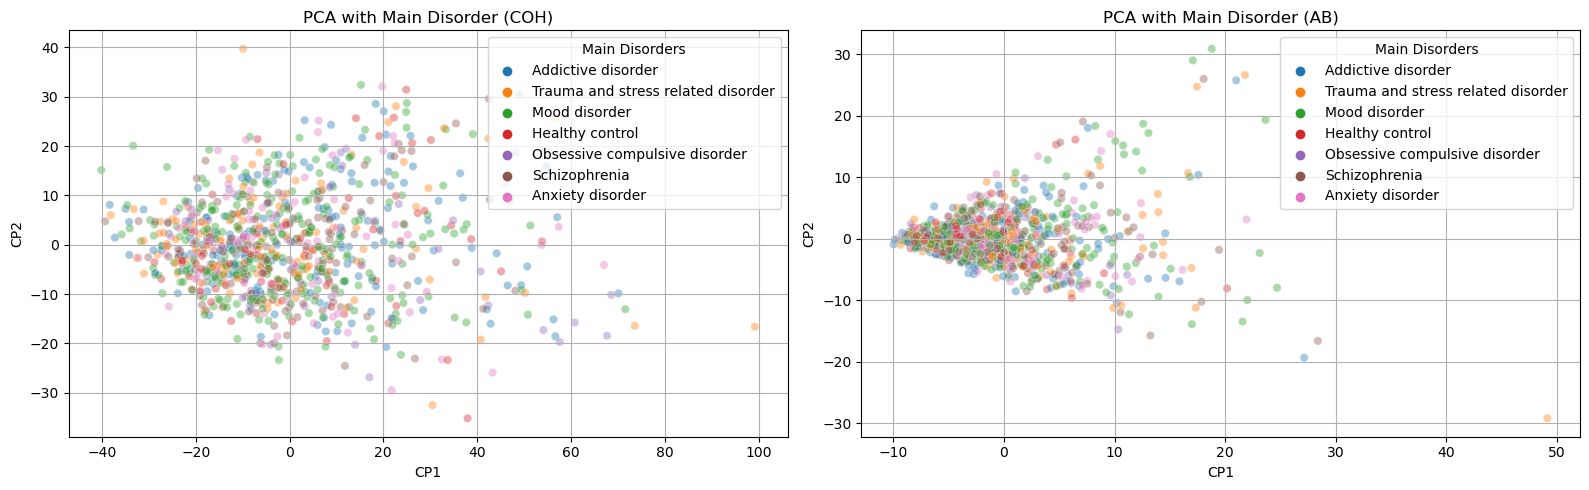

In [24]:
scaler = StandardScaler()
scaled_COHdata = scaler.fit_transform(df[COH_cols])

pca = PCA(n_components=2)
pca.fit(scaled_COHdata)
reduced_data = pca.transform(scaled_COHdata)

pca_df_COH = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df_COH['target'] = df['main.disorder']

scaled_ABdata = scaler.fit_transform(df[AB_cols])

pca = PCA(n_components=2)
pca.fit(scaled_ABdata)
reduced_data = pca.transform(scaled_ABdata)

pca_df_AB = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df_AB['target'] = df['main.disorder']


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_pca(pca_df_COH, axes[0], 'PCA with Main Disorder (COH)')
plot_pca(pca_df_AB, axes[1], 'PCA with Main Disorder (AB)')

plt.tight_layout()
plt.show()

Difficult to interpret the relationship between the variance of the Principal Components of the COH variables with the target (Main disorders). There seem to be no significant differences in the main components in relation to the Target.